# Import functions and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms

In [2]:
ds=pd.read_csv(r"/Users/shama/Desktop/flipr/Train_dataset.csv")

In [3]:
ds

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987851
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7378,AC3230,NSE,Healthcare,773.91,11270.15,40.28,61.37,19212221.0,4.34,0.78,0.0340,74.9,0.98,NaN,248.019321
7379,AC3231,JSE,Information Tech,61.97,55722.00,79.56,62.90,8108942.0,3.48,0.23,0.0528,17.7,0.84,NaN,494.555631
7380,AC3232,JSE,Materials,131.99,55722.00,26.16,198.77,8382586.0,3.04,0.03,0.0359,17.7,1.22,NaN,500.869063
7381,AC3233,S&P 500,Materials,643.72,3351.28,29.24,38.83,18638400.0,2.66,0.03,0.0581,1.0,1.04,NaN,113.170686


In [4]:
ds.isnull().any()

Stock Index             False
Index                   False
Industry                False
VWAP                     True
General Index            True
NAV                      True
P/E Ratio                True
Volumes Traded           True
Inventory Turnover       True
Covid Impact (Beta)      True
Tracking Error           True
Dollar Exchange Rate     True
Put-Call Ratio           True
P/B Ratio                True
Stock Price             False
dtype: bool

In [5]:
ds.fillna(ds.mean(),inplace=True)

In [6]:
ds.isnull().any()

Stock Index             False
Index                   False
Industry                False
VWAP                    False
General Index           False
NAV                     False
P/E Ratio               False
Volumes Traded          False
Inventory Turnover      False
Covid Impact (Beta)     False
Tracking Error          False
Dollar Exchange Rate    False
Put-Call Ratio          False
P/B Ratio               False
Stock Price             False
dtype: bool

# Data correlation and visualization

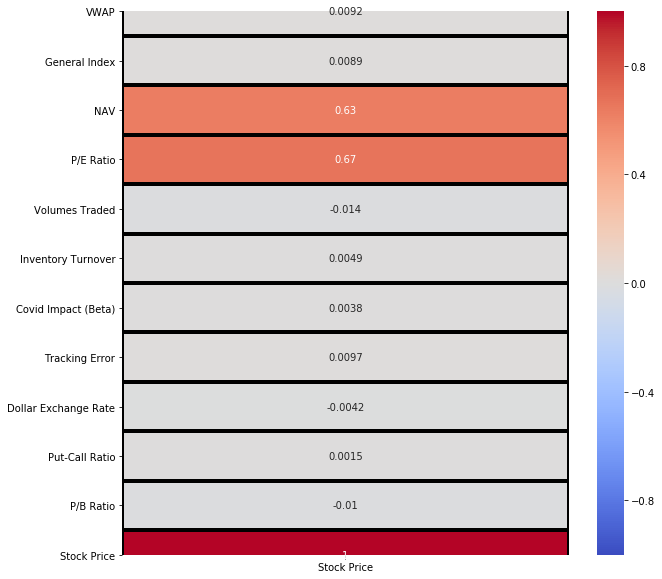

In [7]:
ds_corr=ds.corr()
plt.figure(figsize=(10,10))
sms.heatmap(ds_corr[["Stock Price"]],annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [8]:
#sms.pairplot(ds, x_vars=["Stock Index","Index","Industry","VWAP","General Index","NAV","P/E Ratio","Volumes Traded","Inventory Turnover","Covid Impact (Beta)","Tracking Error","Dollar Exchange Rate","Put-Call Ratio","P/B Ratio"],y_vars=["Stock Price"])

# Spliting Data

In [9]:
x=ds.iloc[:,1:14].values
y=ds.iloc[:,14:15].values

In [10]:
y

array([[ 156.9878515],
       [ 560.8596216],
       [1279.732874 ],
       ...,
       [ 500.869063 ],
       [ 113.1706856],
       [ 236.6410854]])

In [11]:
from sklearn.preprocessing import LabelEncoder
ld=LabelEncoder()
x[:,0]=ld.fit_transform(x[:,0])
x[:,1]=ld.fit_transform(x[:,1])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

# Model training

In [13]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred=mlr.predict(x_test)

# Accuracy

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8785360502937098

# Test data 

In [16]:
df=pd.read_csv(r"/Users/shama/Desktop/flipr/Test_dataset.csv")

In [17]:
df.isnull().any()

Stock Index             False
Index                   False
Industry                False
VWAP                     True
General Index            True
NAV                      True
P/E Ratio                True
Volumes Traded           True
Inventory Turnover       True
Covid Impact (Beta)      True
Tracking Error           True
Dollar Exchange Rate     True
Put-Call Ratio           True
P/B Ratio                True
dtype: bool

In [18]:
df.fillna(ds.mean(),inplace=True)

In [19]:
df.isnull().any()

Stock Index             False
Index                   False
Industry                False
VWAP                    False
General Index           False
NAV                     False
P/E Ratio               False
Volumes Traded          False
Inventory Turnover      False
Covid Impact (Beta)     False
Tracking Error          False
Dollar Exchange Rate    False
Put-Call Ratio          False
P/B Ratio               False
dtype: bool

In [20]:
x=df.iloc[:,1:14].values

In [21]:
from sklearn.preprocessing import LabelEncoder
ld=LabelEncoder()
x[:,0]=ld.fit_transform(x[:,0])
x[:,1]=ld.fit_transform(x[:,1])

In [22]:
y1=mlr.predict(x)

In [23]:
y1

array([[ 866.38695243],
       [ 410.35771922],
       [1309.83784619],
       ...,
       [ 578.68359562],
       [ 583.01315205],
       [1159.47189866]])

# Store in excel

In [24]:
dg=pd.DataFrame(y1)

In [25]:
writer = pd.ExcelWriter('/Users/shama/Desktop/flipr/Book.xlsx',engine='xlsxwriter')
dg.to_excel(writer, sheet_name='Sheet1', startrow=0 , startcol=1,index=False,index_label='Stock Price')
writer.save()